# NB-HI6: VIC parameter maps

## module loading...

In [1]:
%matplotlib inline  

import os
import sys
from timeit import default_timer as timer
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
import numpy as np
import pandas as pd
import xarray as xr

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

print("\nThe Python version: %s.%s.%s" % sys.version_info[:3])
print(xr.__name__, xr.__version__)

mpl.rcParams['xtick.labelsize']='small'

numpy version  :  1.19.2
pandas version :  1.2.1
xarray version :  0.16.2

The Python version: 3.7.0
xarray 0.16.2


In [2]:
from cmip5_oconus.plot import custom_div_cmap, MidpointNormalize, add_ylabel

-------------------------
## Setup 

In [3]:
figSave = True

In [4]:
region     = 'hawaii'    # hawaii or alaska

param_path = f'/glade/p/ral/hap/mizukami/oconus_hydro/{region}_run/params'

param_nc = {'hawaii': 'vic_parameters_hawaii_1km.nc',
            'alaska': 'vic_parameters_alaska_12km_full.nc'}

## Load the data

In [5]:

# VIC parameter 
ds_parameter = xr.open_dataset(os.path.join(param_path, param_nc[region]))

# domain ascii file
#df_domain = pd.read_csv("%s/vic_hawaii.mask" % (data_path), header=0, delim_whitespace=True, index_col=1)
#ds_domain = xr.Dataset.from_dataframe(df_domain)
#ds_domain.rename({'gridcel':'hruid'}, inplace=True)

# merge domain and parameter dataset
#ds_data_hi = xr.merge([ds_domain, ds_parameter])

In [6]:
ds_parameter

<xarray.Dataset>
Dimensions:       (lat: 369, lon: 555, month: 12, nlayer: 3, root_zone: 3, veg_class: 12)
Coordinates:
  * lat           (lat) float64 18.91 18.92 18.93 18.94 ... 22.21 22.22 22.23
  * lon           (lon) float64 -159.8 -159.8 -159.8 ... -154.8 -154.8 -154.8
  * veg_class     (veg_class) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * root_zone     (root_zone) int32 1 2 3
  * month         (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlayer
Data variables:
    mask          (lat, lon) float64 ...
    layer         (nlayer) int32 ...
    run_cell      (lat, lon) float64 ...
    gridcell      (lat, lon) float64 ...
    lats          (lat, lon) float64 ...
    lons          (lat, lon) float64 ...
    infilt        (lat, lon) float64 ...
    Ds            (lat, lon) float64 ...
    Dsmax         (lat, lon) float64 ...
    Ws            (lat, lon) float64 ...
    c             (lat, lon) float64 ...
    expt          (nlayer, lat, lon) float64 ...
    Ksat          (nlayer, lat, lon) float64 ...
    phi_s         (nlayer, lat, lon) float64 ...
    init_moist    (nlayer, lat, lon) float64 ...
    elev          (lat, lon) float64 ...
    depth         (nlayer, lat, lon) float64 ...
    avg_T         (lat, lon) float64 ...
    dp            (lat, lon) float64 ...
    bubble        (nlayer, lat, lon) float64 ...
    quartz        (nlayer, lat, lon) float64 ...
    bulk_density  (nlayer, lat, lon) float64 ...
    soil_density  (nlayer, lat, lon) float64 ...
    off_gmt       (lat, lon) timedelta64[ns] ...
    Wcr_FRACT     (nlayer, lat, lon) float64 ...
    Wpwp_FRACT    (nlayer, lat, lon) float64 ...
    rough         (lat, lon) float64 ...
    snow_rough    (lat, lon) float64 ...
    annual_prec   (lat, lon) float64 ...
    resid_moist   (nlayer, lat, lon) float64 ...
    fs_active     (lat, lon) float64 ...
    July_Tavg     (lat, lon) float64 ...
    veg_descr     (veg_class) object ...
    Nveg          (lat, lon) float64 ...
    Cv            (veg_class, lat, lon) float64 ...
    root_depth    (veg_class, root_zone, lat, lon) float64 ...
    root_fract    (veg_class, root_zone, lat, lon) float64 ...
    overstory     (veg_class, lat, lon) float64 ...
    rarc          (veg_class, lat, lon) float64 ...
    rmin          (veg_class, lat, lon) float64 ...
    wind_h        (veg_class, lat, lon) float64 ...
    RGL           (veg_class, lat, lon) float64 ...
    rad_atten     (veg_class, lat, lon) float64 ...
    wind_atten    (veg_class, lat, lon) float64 ...
    trunk_ratio   (veg_class, lat, lon) float64 ...
    LAI           (veg_class, month, lat, lon) float64 ...
    albedo        (veg_class, month, lat, lon) float64 ...
    veg_rough     (veg_class, month, lat, lon) float64 ...
    displacement  (veg_class, month, lat, lon) float64 ...
Attributes:
    description:  VIC parameter file
    history:      Created: Sat Apr  3 22:38:17 2021\n./txt2nc_vicparam.py\n
    source:       ./txt2nc_vicparam.py
    username:     mizukami
    host:         cheyenne1

In [ ]:
ds_parameter['bubble'] = ds_parameter['bubble']

## Plotting

In [7]:
# create colormap
# ---------------

# create a colormap that consists of
# - 1/5 : custom colormap, ranging from white to the first color of the colormap
# - 4/5 : existing colormap

# set upper part: 4 * 256/4 entries
upper = mpl.cm.Spectral_r(np.arange(256))

# set lower part: 1 * 256/4 entries
# - initialize all entries to 1 to make sure that the alpha channel (4th column) is 1
lower = np.ones((int(256/4),4))
# - modify the first three columns (RGB):
#   range linearly between white (1,1,1) and the first color of the upper colormap
for i in range(3):
    lower[:,i] = np.linspace(0.9, upper[0,i], lower.shape[0])

# combine parts of colormap
cmap = np.vstack(( lower, upper ))

# convert to matplotlib colormap
cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

------------
 - The same as above except for two future periods in 21st century (early, mid, and late) 

In [18]:
cm = {'regular'   : cmap}

sfmt = mpl.ticker.ScalarFormatter(useMathText=True)
sfmt.set_powerlimits((0, 0))

cbar_kwrgs = {'scientific':   {"orientation":"horizontal", "shrink":0.990, "pad":0.03, 'format':sfmt},
              'regular':      {"orientation":"horizontal", "shrink":0.990, "pad":0.03}}

style_kwargs = {'regular':   {'add_labels': False, 'xticks':[], 'yticks':[], 'cbar_kwargs': cbar_kwrgs['regular']}}

kwargs = {'LAI':         {'levels': 6, 'vmin':0, 'vmax':8,  'cmap':cm['regular'], 'extend':'neither', **style_kwargs['regular']},
          'Wcr_FRACT':   {'levels': 13, 'vmin':0.2, 'vmax':0.8,  'cmap':cm['regular'], 'extend':'neither', **style_kwargs['regular']},
          'Wpwp_FRACT':  {'levels': 13, 'vmin':0.2, 'vmax':0.8,  'cmap':cm['regular'], 'extend':'neither', **style_kwargs['regular']}
          }  

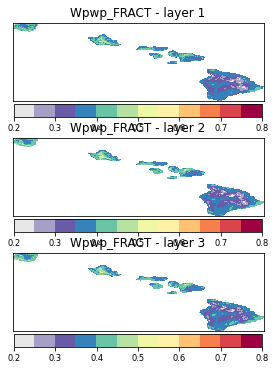

In [30]:
# Three layer parameters
# 'D1', 0.001,0.020
# 'bd',  1000, 1400
# 'ks', 0.001, 0.0040
# 'WcrFrac',0.50,0.75
# 'WpwpFrac', 0.25, 0.45
param='Wpwp_FRACT'
nlyr=3

fig, axes = plt.subplots(nrows=nlyr, ncols=1,figsize=(4.5, 2.0*nlyr))
for idx, ax in enumerate(axes.flat):
    ds_parameter[param][idx,:,:].plot.pcolormesh(ax=ax, **kwargs[param]) #
    ax.axes.set_title('%s - layer %d' % (param, idx+1))
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    #if idx+1 == nlyr:
        
    

------------
 - zzzz

--------
- xxxx